In [21]:
from skimage.filters import median, rank, threshold_otsu
from skimage.morphology import disk,erosion, dilation, opening, closing, skeletonize, square
from skimage.util import random_noise
import matplotlib.pyplot as plt
from skimage import io, img_as_float, img_as_bool
from skimage.color import label2rgb


### Task 1

In [22]:

# Load the image
image = img_as_float(io.imread('sample.png', as_gray=True))

# Add salt-and-pepper noise to the image
noisy_image = random_noise(image, mode='s&p', amount=0.05)

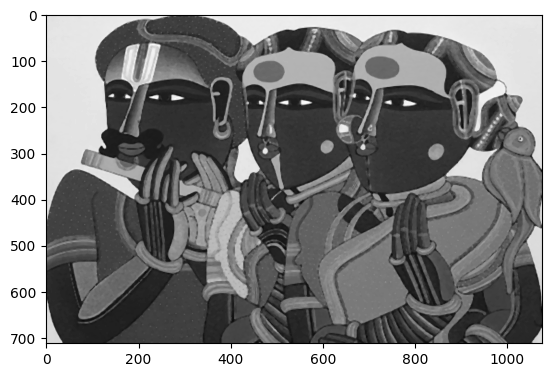

In [23]:
#  median filter
median_filtered_image = median(noisy_image, disk(3))
plt.imshow(median_filtered_image, cmap=plt.cm.gray)

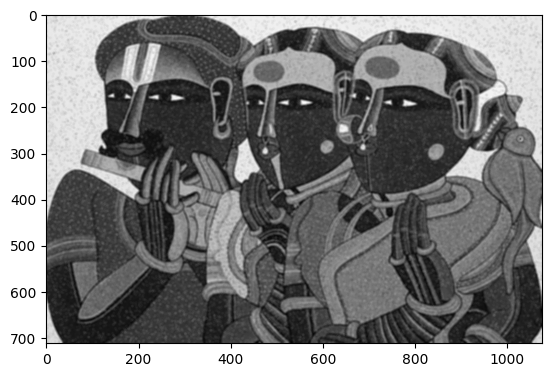

In [24]:
#  mean filter (using rank.mean)
mean_filtered_image = rank.mean(noisy_image, disk(3))
plt.imshow(mean_filtered_image, cmap=plt.cm.gray)

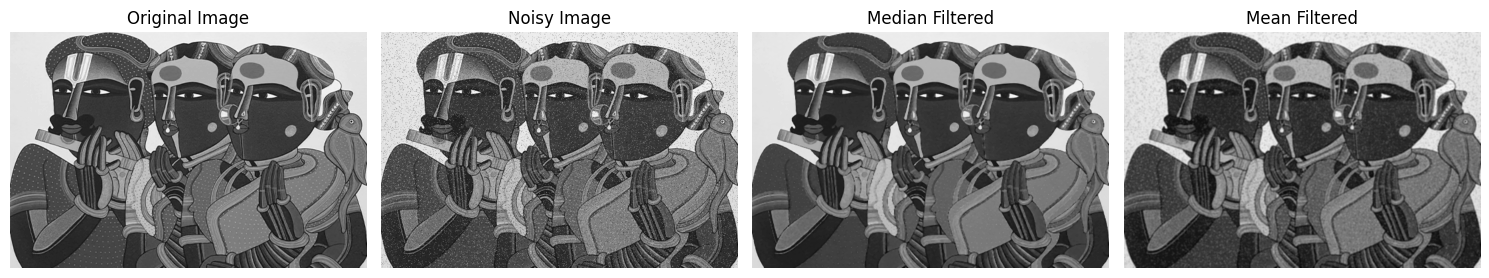

In [25]:
# Display the images
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original Image')

ax[1].imshow(noisy_image, cmap=plt.cm.gray)
ax[1].set_title('Noisy Image')

ax[2].imshow(median_filtered_image, cmap=plt.cm.gray)
ax[2].set_title('Median Filtered')

ax[3].imshow(mean_filtered_image, cmap=plt.cm.gray)
ax[3].set_title('Mean Filtered')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

####  Answer:
1.  median filter  performs better at retaining image details while removing salt-and-pepper noise because it preserves edges and fine details better than the mean filter.

### Task 2

In [26]:

# Performing threshold-based segmentation using Otsu’s method
thresh = threshold_otsu(image)
binary_mask = image > thresh



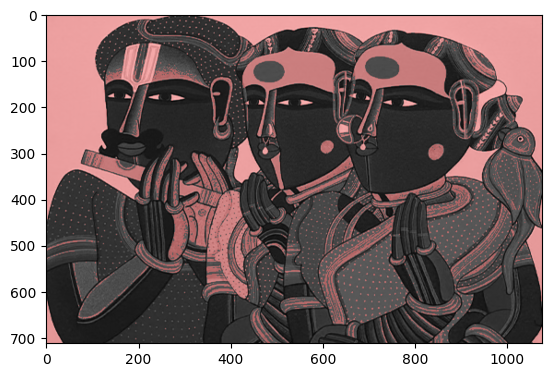

In [27]:
# Highlighting the segmented regions using a binary mask
segmented_image = label2rgb(binary_mask, image=image, bg_label=0)
plt.imshow(segmented_image)

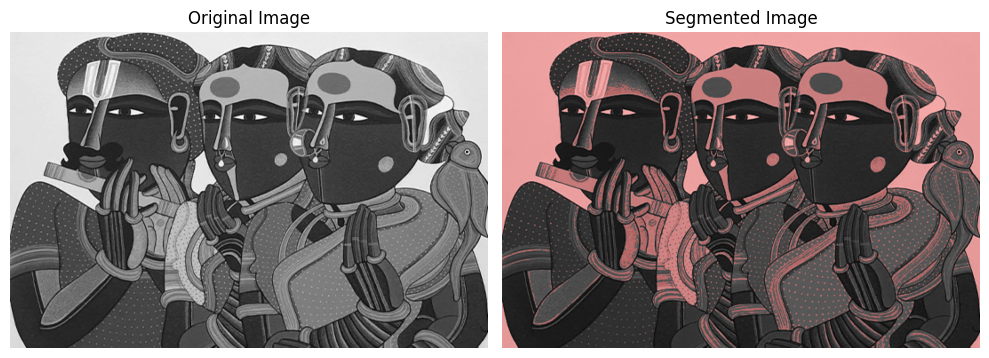

In [28]:
# Displaying  the original and segmented images side-by-side
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original Image')

ax[1].imshow(segmented_image)
ax[1].set_title('Segmented Image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

####  Answer:
1. Thresholding Impact: Thresholding using Otsu’s method helps in separating the regions of interest from the background by converting the image into a binary mask. This enhances the clarity of the regions of interest by highlighting them distinctly.
2. Comparison: The side-by-side comparison of the original and segmented images shows how the regions of interest are clearly highlighted in the segmented image, making it easier to analyze specific areas.

### Task 3

In [29]:
# Defining a 3x3 structuring element
selem = square(3)

In [30]:
#  erosion
eroded_image = erosion(image, selem)

#  dilation
dilated_image = dilation(image, selem)

# opening
opened_image = opening(image, selem)

# closing
closed_image = closing(image, selem)

#skeleton
skeleton_image = skeletonize(image)

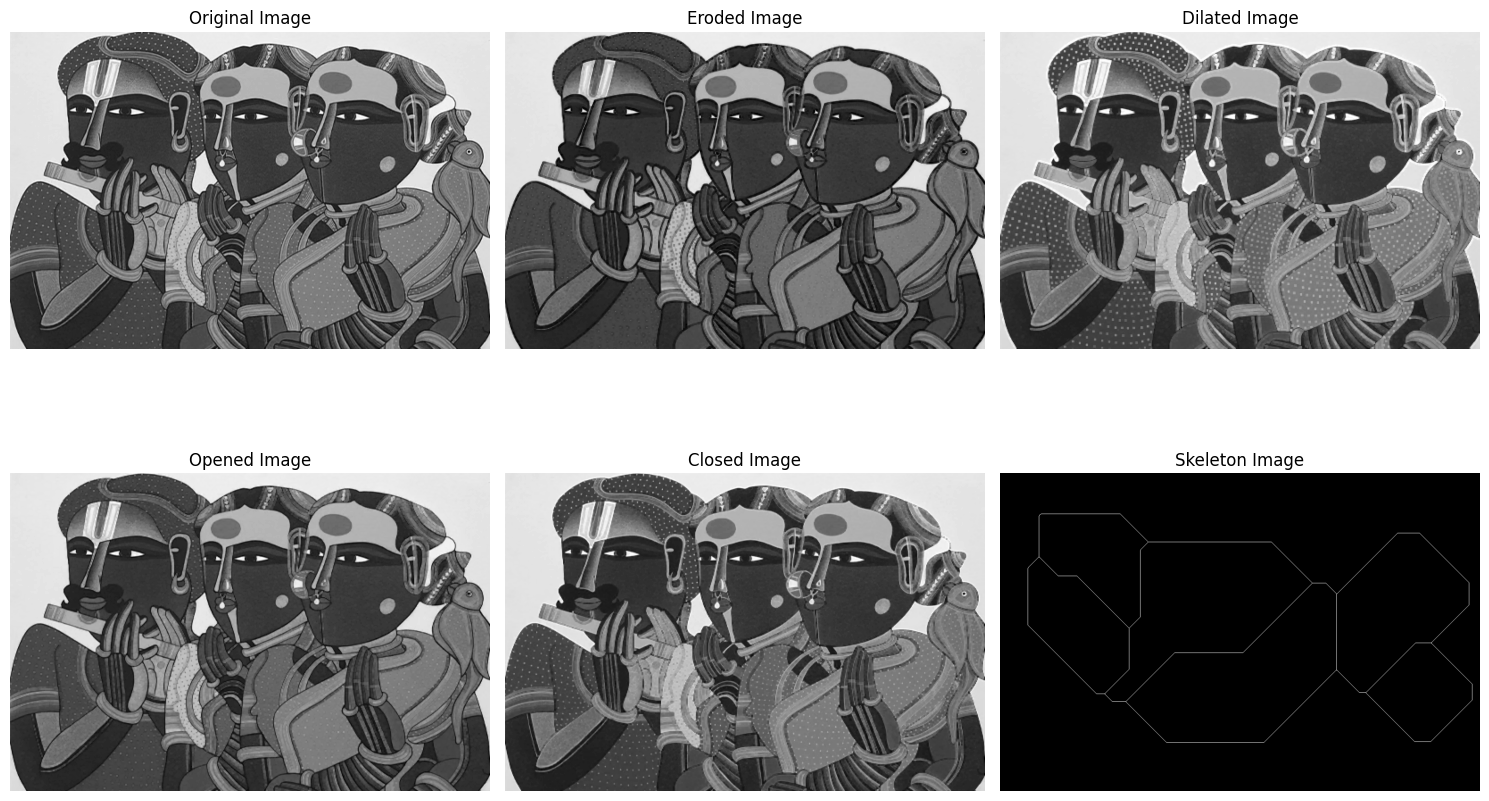

In [31]:
# Display the images
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original Image')

ax[1].imshow(eroded_image, cmap=plt.cm.gray)
ax[1].set_title('Eroded Image')

ax[2].imshow(dilated_image, cmap=plt.cm.gray)
ax[2].set_title('Dilated Image')

ax[3].imshow(opened_image, cmap=plt.cm.gray)
ax[3].set_title('Opened Image')

ax[4].imshow(closed_image, cmap=plt.cm.gray)
ax[4].set_title('Closed Image')

ax[5].imshow(skeleton_image, cmap=plt.cm.gray)
ax[5].set_title('Skeleton Image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

### Answer:
1. Erosion: Removes pixels on object boundaries, shrinking the objects. It is useful for removing small noise.
2. Dilation: Adds pixels to object boundaries, expanding the objects. It can fill small holes and gaps.
3. Opening: Erosion followed by dilation. It removes small objects and noise while preserving the shape and size of larger objects.
4. Closing: Dilation followed by erosion. It fills small holes and gaps while preserving the shape and size of objects.
5. Skeletonization: Reduces objects to their skeletal form, preserving the overall structure and connectivity.

######  Each operation affects the image differently, and visualizing each step helps in understanding their impact on the image.